In [1]:
# Import partition data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('oviIN_combined/preprocessed-v1.2.1/preprocessed_nodes.csv', index_col=0)

In [2]:
df

,key,0.0,0.1,0.25,0.5,0.75,instance,celltype,pre,post,...,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
id,,,,,,,,,,,,,,,,,,,,,
1003215282,1,1,1,1,1,1,CL229_R,CL229,100,439,...,Traced,False,Roughly traced,PDM19,301.0,"[23044, 14981, 11600]","{'INP': {'pre': 87, 'post': 351, 'downstream':...",NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S..."
1005952640,2,1,2,2,2,2,IB058_R,IB058,664,2047,...,Traced,False,Roughly traced,PVL20,NaN,NaN,"{'INP': {'pre': 464, 'post': 1327, 'downstream...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S..."
1006928515,3,1,2,2,3,3,CL300_R,CL300,86,173,...,Traced,False,Roughly traced,PVL13,236.0,"[12083, 10523, 16816]","{'INP': {'pre': 79, 'post': 126, 'downstream':...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S..."
1007260806,4,1,1,1,4,4,CL301_R,CL301,119,226,...,Traced,False,Roughly traced,PVL13,236.0,"[13524, 10108, 16480]","{'INP': {'pre': 40, 'post': 128, 'downstream':...",NaN,"['GOR(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['IB', 'ICL(R)', 'INP', 'PLP(R)', 'SCL(R)', 'S..."
1007308577,5,2,3,2,5,5,None,None,54,2740,...,Traced,True,Leaves,NaN,NaN,NaN,"{'SNP(L)': {'pre': 5, 'post': 486, 'downstream...",NaN,"['ATL(L)', 'ATL(R)', 'GOR(L)', 'IB', 'ICL(L)',...","['ATL(L)', 'ATL(R)', 'IB', 'ICL(R)', 'INP', 'S..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988654188,6339,2,596,684,1371,1908,None,None,11,10,...,Orphan,NaN,Orphan,NaN,NaN,NaN,"{'SNP(L)': {'pre': 11, 'post': 10, 'downstream...",NaN,"['SMP(L)', 'SNP(L)']","['SMP(L)', 'SNP(L)']"
988905105,6340,5,621,1035,1597,31,None,None,0,11,...,Assign,NaN,0.5assign,NaN,NaN,NaN,"{'SNP(R)': {'post': 11}, 'SMP(R)': {'post': 11}}",NaN,"['SMP(R)', 'SNP(R)']",[]
988909130,6341,5,9,16,133,72,FB5V_R,FB5V,269,1745,...,Traced,False,Roughly traced,AVM10,296.5,"[13226, 32024, 18600]","{'SNP(R)': {'pre': 1, 'post': 28, 'downstream'...",CRELALFB5,"['AB(R)', 'CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX',...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F..."


Option: Find all the coarse clusters that bodyIds from a higher res cluster came from

## Testing function steps 

In [174]:
# Figure out how to get the lists of unique cluster numbers from df
df_test = df[df['0.0']==1]
df_test['0.1'].unique()

array([  1,   2,   5,   3,   8,  10,  11,  20,  34,  36,   9,  51,  57,
        13,  71,   4,   7,  96, 101, 111, 124, 115, 132, 133, 135, 141,
       149, 155, 159, 168, 170, 173, 174, 177, 178, 180, 182, 183, 184,
       185, 187, 188, 189,  80, 190, 191, 193, 195, 196, 202, 208, 209,
       210, 172, 212, 213, 214, 215, 217, 219, 220, 221, 222, 226, 227,
       229, 231, 232, 233, 234, 281, 142,  24, 293, 306, 315, 257, 318,
       320, 323, 324, 328, 332, 336, 339, 340, 342, 345, 346, 347, 326,
       350, 352, 241, 353, 358, 360, 365, 368, 372, 377, 383, 385, 386,
       387, 390, 399, 404, 406, 408, 413, 418, 419, 422, 423, 427, 429,
       437, 444, 445, 447, 449, 450, 452, 454, 455, 459, 460, 466, 467,
       468, 469, 475, 476, 477, 479, 482, 485, 492, 494, 496, 504, 509,
       512, 521, 523, 524, 118, 525, 526, 529, 531, 532, 533, 535, 545,
        42, 549, 550, 551, 555, 556, 560, 565, 570, 571, 573, 576, 578,
       579, 585, 589, 607, 611, 615, 622])

In [169]:
# This will need to be a nest for loop 
# The outer loop will iterate over the coarse modules
# The inner loop will iterate over all chi values other than 0.0

chi_values = ['0.1']
coarse_modules = [1,2,3,4,5,6] #
# make cluster all a 3D array with dimensions (len(coarse_modules), len(chi_values), Whatever length needed)
cluster_all = np.zeros((len(coarse_modules),len(chi_values), 600))
cluster_all.shape

(6, 1, 600)

In [170]:
for i, x in enumerate(coarse_modules):
    df_test = df[df['0.0']==x]
    for f, y in enumerate(chi_values):
        cluster = df_test[y].unique()
        cluster_all[i,f, :len(cluster)] = cluster

In [171]:
cluster_all[:, 0, :]

array([[ 1.,  2.,  5., ...,  0.,  0.,  0.],
       [ 3.,  7.,  5., ...,  0.,  0.,  0.],
       [ 4., 12.,  5., ...,  0.,  0.,  0.],
       [ 6., 14.,  5., ...,  0.,  0.,  0.],
       [ 9., 13., 28., ...,  0.,  0.,  0.],
       [ 2.,  9.,  5., ...,  0.,  0.,  0.]])

In [80]:
# Remove the zeros from the array
point1_test = cluster_all[0,0]
new_point1 = point1_test[point1_test != 0]

In [105]:
# Create a dictionary for each resolution
dict_pointone = {}
dict_25 = {}
dict_5 = {}

for i, x in enumerate(coarse_modules):
    dict_pointone[coarse_modules[i]] = cluster_all[i,0]
    dict_25[coarse_modules[i]] = cluster_all[i,1]
    dict_5[coarse_modules[i]] = cluster_all[i,2]

In [106]:
# go through each dictionary and remove the zeros from value arrays
for key, value in dict_pointone.items():
    dict_pointone[key] = value[value != 0]

for key, value in dict_25.items():
    dict_25[key] = value[value != 0]

for key, value in dict_5.items():
    dict_5[key] = value[value != 0]
    

In [107]:
# change all dictionary values to arrays with integers
for key, value in dict_pointone.items():
    dict_pointone[key] = np.array(value, dtype='int64')

for key, value in dict_25.items():
    dict_25[key] = np.array(value, dtype='int64')

for key, value in dict_5.items():
    dict_5[key] = np.array(value, dtype='int64')

In [175]:
dict_pointone[5]

array([  9,  13,  28,  29,  24,  37,  38,   5,  43,  44,  45,  46,  42,
        48,   7,  53,  58,   3,  66,  67,  69,  70,  72,  78,  40,  81,
        84,  85,  87,  88,  97,  98, 100, 102, 105,  80, 107, 109, 113,
       116, 119, 123, 125, 126, 128, 129,  14, 131, 134, 139, 140, 137,
       144, 146, 150, 151, 152, 153, 154, 115, 156, 160, 161, 163, 165,
       167, 169, 171, 172, 175, 176, 179, 181, 186,   1, 192, 200, 201,
       198, 203, 204, 205, 207, 216, 218, 223, 224, 225, 230, 235, 301,
         2, 397, 554, 558, 567, 577, 581, 588, 598, 621])

In [180]:
df[df['0.0']==9]

,key,0.0,0.1,0.25,0.5,0.75,instance,celltype,pre,post,...,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
id,,,,,,,,,,,,,,,,,,,,,


In [183]:
# replace values with bodyIds for each cluster at 0.1
# create a new dictionary to store the bodyIds with the same keys
dict_new = {1: [], 2: [], 3: [], 4: [], 5: [], 6: []}
for key, value in dict_pointone.items():
    body_ids = []
    for i, x in enumerate(value):
        body_ids.extend(df[df['0.1']==x].index.tolist())
    dict_new[key] = body_ids

## Jaccard Functions created

In [418]:
# create a function that takes in two lists of id numbers and returns the jaccard sim of the two lists
def calculate_difference(list1, list2):
    set1 = set(list1)
    set2 = set(list2)

    unique_1 = set1-set2
    unique_2 = set2-set1

    common = set1.intersection(set2)
    total_unique = len(unique_1) + len(unique_2)
    jaccard_sim = len(common) / (total_unique + len(common))

    return unique_1, unique_2, common, jaccard_sim

# function that takes in a partition dataframe, the modules at the base resolution, and the chi value at which to compare
def get_body_ids(df, coarse_modules, chi):
    """ This function takes in a partition dataframe, the modules at the base resolution, and the chi value at which to compare. 
    It returns a dictionary of body IDs for each cluster number at the resolution and a dictionary of body IDs for each cluster 
    number at the base resolution."""
    # Need bodyIds at zero resolution for each cluster number
    dict_zero = {1: [], 2: [], 3: [], 4: [], 5: [], 6: []}
    for key, value in dict_zero.items():
        dict_zero[key] = df[df['0.0']==key].index.tolist()

    # Gets cluster numbers for resolution
    chi_values = [chi]
    cluster_all = np.zeros((len(coarse_modules),len(chi_values), 800))
    for i, x in enumerate(coarse_modules):
        df_test = df[df['0.0']==x]
        for f, y in enumerate(chi_values):
            cluster = df_test[y].unique()
            cluster_all[i,f, :len(cluster)] = cluster

    # move everything to a dictionary
    dict = {}
    for i, x in enumerate(coarse_modules):
        dict[coarse_modules[i]] = cluster_all[i,0]
    
    # Remove the zeros from the array
    for key, value in dict.items():
        dict[key] = value[value != 0]
        dict[key] = np.array(value, dtype='int64')
    
    # Get bodyIDs for each cluster number in the resolution
    dict_new = {1: [], 2: [], 3: [], 4: [], 5: [], 6: []}
    for key, value in dict.items():
        body_ids = []
        for i, x in enumerate(value):
            body_ids.extend(df[df[chi]==x].index.tolist())
        dict_new[key] = body_ids

    return dict_new, dict_zero
    
# Function that takes in partition dataframe, the modules at the base resolution, and the chi value at which to compare
def main_jaccard(df, coarse_modules, chi):
    """ This function takes in a partition dataframe, the modules at the base resolution, and the chi 
    value at which to compare. It returns a dataframe of the jaccard similarities between the resolutions at each cluster"""

    # Get the body IDs for each cluster number at the resolution and the base resolution
    dict_new, dict_zero = get_body_ids(df, coarse_modules, chi)

    # Create a dictionary to store the jaccard similarities
    jaccard_dict = {}
    for key, value in dict_new.items():
        jaccard_dict[key] = []
        unique_1, unique_2, common, jaccard_sim = calculate_difference(dict_new[key], dict_zero[key])
        jaccard_dict[key].append(jaccard_sim)
    
    # Create a dataframe to store the jaccard similarities
    df_jaccard = pd.DataFrame(jaccard_dict)
    df_jaccard.index = np.arange(1, len(df_jaccard)+1)
    
    return df_jaccard
    

## Using Function and Plotting data

In [419]:
jaccard_values = main_jaccard(df, coarse_modules, '0.1')
jaccard_25 = main_jaccard(df, coarse_modules, '0.25')
jaccard_5 = main_jaccard(df, coarse_modules, '0.5')
jaccard_75 = main_jaccard(df, coarse_modules, '0.75')

# Combine the two dataframes and switch the rows and columns
jaccard_values = jaccard_values._append([jaccard_25, jaccard_5, jaccard_75])
jaccard_values = jaccard_values.T
jaccard_values.columns = ['0.1', '0.25', '0.5', '0.75']
jaccard_values

,0.1,0.25,0.5,0.75
1,0.253169,0.305305,0.546661,0.623168
2,0.327698,0.360199,0.561847,0.663351
3,0.188899,0.231141,0.433099,0.546667
4,0.146247,0.207355,0.629454,0.690104
5,0.195482,0.277284,0.481013,0.553515
6,0.192905,0.288695,0.459244,0.576173


Text(0.5, 1.0, 'Jaccard Similarity between 0.0 and 0.1, 0.25')

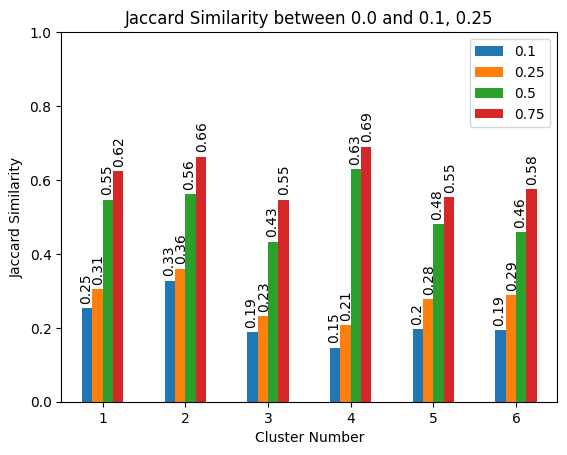

In [425]:
fig, ax  = plt.subplots()
jaccard_values.plot(kind='bar', ax=ax)

# annotate with value of each bar from jaccard_values dataframe
for i, v in enumerate(jaccard_values['0.1']):
    ax.text(i-0.2, v+.02, round(v, 2), color='black', ha='center', rotation=90)
for i, v in enumerate(jaccard_values['0.25']):
    ax.text(i-0.05, v+.02, round(v, 2), color='black', ha='center', rotation=90)
for i, v in enumerate(jaccard_values['0.5']):
    ax.text(i+0.05, v+.02, round(v, 2), color='black', ha='center', rotation=90)
for i, v in enumerate(jaccard_values['0.75']):
    ax.text(i+0.2, v+.02, round(v, 2), color='black', ha='center', rotation=90)
ax.set_ylim(0, 1)
ax.set_xticklabels(['1', '2', '3', '4', '5', '6'], rotation=0)
ax.set_xlabel('Cluster Number')
ax.set_ylabel('Jaccard Similarity')
ax.set_title('Jaccard Similarity between 0.0 and 0.1, 0.25')

Text(0.5, 1.0, 'Jaccard Similarity of Clusters as Resolution Changes')

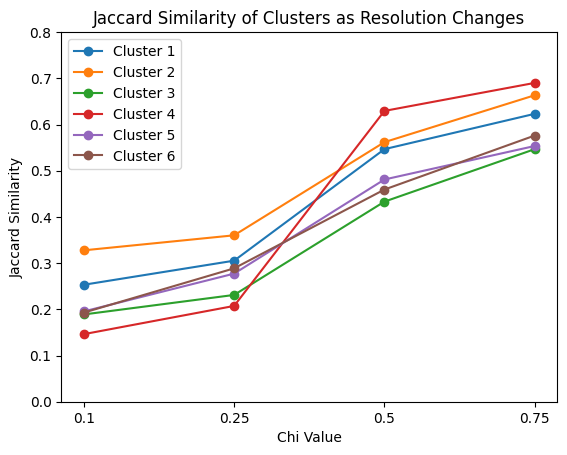

In [426]:
fig, ax  = plt.subplots()
for i in range(0, 6):
    ax.plot(jaccard_values.columns, jaccard_values.iloc[i], marker = "o", label=f'Cluster {i+1}')

ax.set_ylim(0, 0.8)
ax.legend()
ax.set_ylabel('Jaccard Similarity')
ax.set_xlabel('Chi Value')
ax.set_title('Jaccard Similarity of Clusters as Resolution Changes')

In [427]:
# Just in prominent inputs
# body IDs of oviINs from Neuprint
oviINr_bodyID = 423101189
oviINl_bodyID = 485934965

# neuprint access
from neuprint import Client
from neuprint import fetch_simple_connections
from util import *


auth_token_file = open("flybrain.auth.txt", 'r')
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:' + 'v1.2.1', token=auth_token)
    log_msg("neuprint Client set up as `np_Client`, version", np_client.fetch_version())
except:
    np_client = None
    log_msg("neuprint Client set up failed!")

ovi_inputs = fetch_simple_connections(None,[oviINr_bodyID, oviINl_bodyID])

ovi_type_inputs = ovi_inputs[['type_pre','weight']]  

# collapse ovi_inputs by cell type and sort in descending order
ovi_type_inputs = ovi_type_inputs.groupby('type_pre', as_index=False).sum().sort_values(by='weight', ascending=False,ignore_index=True)

# filter out cell types with less than 10 inputs
ovi_type_inputs = ovi_type_inputs[ovi_type_inputs['weight'] >= 10]

prominent_types = ovi_type_inputs.head(20)
                                  
prom_df = df[df['celltype'].isin(prominent_types['type_pre'])]

2024 03 24 23:17:11  neuprint Client set up as `np_Client`, version 0.1.0


In [428]:
jaccard_prom1 = main_jaccard(prom_df, coarse_modules, '0.1')
jaccard_prom25 = main_jaccard(prom_df, coarse_modules, '0.25')
jaccard_prom5 = main_jaccard(prom_df, coarse_modules, '0.5')
jaccard_prom75 = main_jaccard(prom_df, coarse_modules, '0.75')

jaccard_prom = jaccard_prom1._append([jaccard_prom25, jaccard_prom5, jaccard_75])
jaccard_prom = jaccard_prom.T
jaccard_prom.columns = ['0.1', '0.25', '0.5', '0.75']

Text(0.5, 1.0, 'Jaccard Similarity between 0.0 and 0.1, 0.5 for Prominent Inputs')

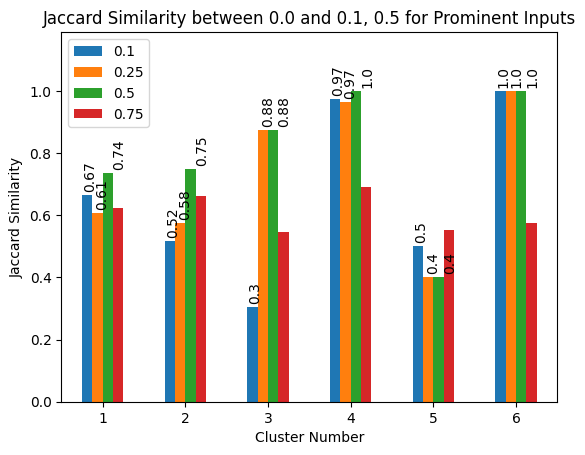

In [429]:
# Plot
fig, ax  = plt.subplots()
jaccard_prom.plot(kind='bar', ax=ax)

# annotate with value of each bar from jaccard_values dataframe
for i, v in enumerate(jaccard_prom['0.1']):
    ax.text(i-0.15, v+.02, round(v, 2), color='black', ha='center', rotation=90)
for i, v in enumerate(jaccard_prom['0.25']):
    ax.text(i, v+.02, round(v, 2), color='black', ha='center', rotation=90)
for i, v in enumerate(jaccard_prom['0.5']):
    ax.text(i+0.2, v+.02, round(v, 2), color='black', ha='center', rotation=90)

ax.set_ylim(0, 1.19)
ax.set_xticklabels(['1', '2', '3', '4', '5', '6'], rotation=0)
ax.set_xlabel('Cluster Number')
ax.set_ylabel('Jaccard Similarity')
ax.set_title('Jaccard Similarity between 0.0 and 0.1, 0.5 for Prominent Inputs')

Text(0.5, 1.0, 'Jaccard Similarity of Clusters as Resolution Changes for Prominent Inputs')

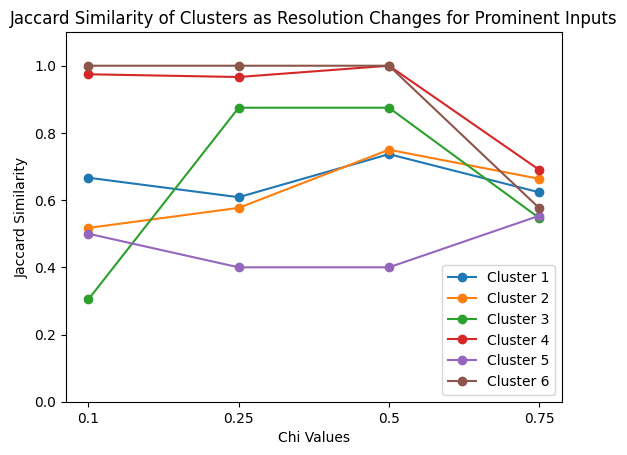

In [430]:
# Plot the jaccard similarities of the prominent inputs as resolution changes
fig, ax  = plt.subplots()
for i in range(0, 6):
    ax.plot(jaccard_prom.columns, jaccard_prom.iloc[i], marker = "o", label=f'Cluster {i+1}')

ax.set_ylim(0, 1.1)
ax.legend()
ax.set_xlabel('Chi Values')
ax.set_ylabel('Jaccard Similarity')
ax.set_title('Jaccard Similarity of Clusters as Resolution Changes for Prominent Inputs')

## Final large plot

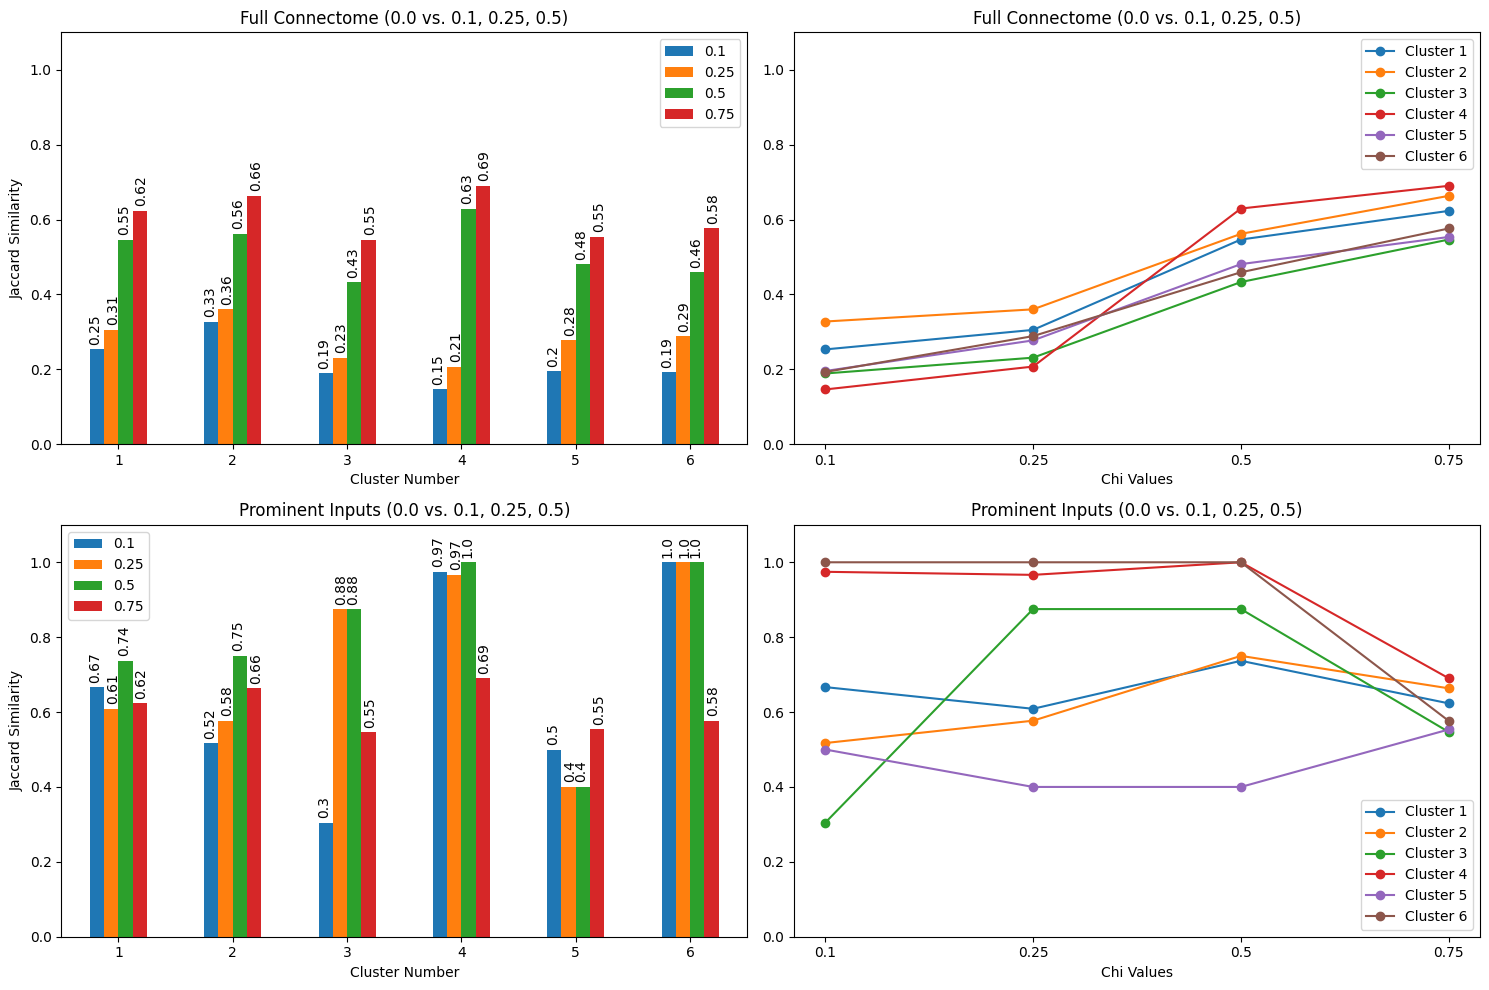

In [443]:
# Plot regular and prominent inputs in subplots next to eachother
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
jaccard_values.plot(kind='bar', ax=axs[0,0])
jaccard_prom.plot(kind='bar', ax=axs[1,0])

# annotate with value of each bar from jaccard_values dataframe
for i, v in enumerate(jaccard_values['0.1']):
    axs[0,0].text(i-.2, v+0.02, round(v, 2), color='black', ha='center', rotation=90)
for i, v in enumerate(jaccard_values['0.25']):
    axs[0,0].text(i-.05, v+0.02, round(v, 2), color='black', ha='center', rotation=90)
for i, v in enumerate(jaccard_values['0.5']):
    axs[0,0].text(i+0.05, v+0.02, round(v, 2), color='black', ha='center', rotation=90)
for i, v in enumerate(jaccard_values['0.75']):
    axs[0,0].text(i+0.2, v+0.02, round(v, 2), color='black', ha='center', rotation=90)
axs[0,0].set_ylim(0, 1.1)
axs[0,0].set_xticklabels(['1', '2', '3', '4', '5', '6'], rotation=0)
axs[0,0].set_xlabel('Cluster Number')
axs[0,0].set_ylabel('Jaccard Similarity')
axs[0,0].set_title('Full Connectome (0.0 vs. 0.1, 0.25, 0.5, 0.75)')

# annotate with value of each bar from jaccard_values dataframe
for i, v in enumerate(jaccard_prom['0.1']):
    axs[1,0].text(i-.2, v+0.02, round(v, 2), color='black', ha='center', rotation=90)
for i, v in enumerate(jaccard_prom['0.25']):
    axs[1,0].text(i-.05, v+0.02, round(v, 2), color='black', ha='center', rotation=90)
for i, v in enumerate(jaccard_prom['0.5']):
    axs[1,0].text(i+0.05, v+0.02, round(v, 2), color='black', ha='center', rotation=90)
for i, v in enumerate(jaccard_prom['0.75']):
    axs[1,0].text(i+0.2, v+0.02, round(v, 2), color='black', ha='center', rotation=90)

axs[1,0].set_ylim(0, 1.1)
axs[1,0].set_xticklabels(['1', '2', '3', '4', '5', '6'], rotation=0)
axs[1,0].set_xlabel('Cluster Number')
axs[1,0].set_ylabel('Jaccard Similarity')
axs[1,0].set_title('Prominent Inputs (0.0 vs. 0.1, 0.25, 0.5, 0.75)')

# Plot the jaccard similarities of the prominent inputs as resolution changes
for i in range(0, 6):
    axs[1, 1].plot(jaccard_prom.columns, jaccard_prom.iloc[i], marker = "o", label=f'Cluster {i+1}')

axs[1, 1].set_ylim(0, 1.1)
axs[1, 1].legend()
axs[1, 1].set_xlabel('Chi Values')
axs[1, 1].set_title('Prominent Inputs (0.0 vs. 0.1, 0.25, 0.5, 0.75)')

# Plot the jaccard similarities of the regular inputs as resolution changes
for i in range(0, 6):
    axs[0,1].plot(jaccard_values.columns, jaccard_values.iloc[i], marker = "o", label=f'Cluster {i+1}')

axs[0,1].set_ylim(0, 1.1)
axs[0,1].legend()
axs[0,1].set_xlabel('Chi Values')
axs[0,1].set_title('Full Connectome (0.0 vs. 0.1, 0.25, 0.5, 0.75)')
plt.tight_layout()